### 코로나 데이터 분석

### 학습 목표
 * 코로나 데이터와 백신 접종률 데이터를 수집하여 지금까지 내용을 나라별로 분석해 본다.
 * 데이터 분석을 통해 pandas에 대해 좀 더 깊이 알아본다.

### 데이터가 수집된 사이트 
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 불러오기

In [2]:
os.listdir(os.getcwd())

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.ipynb',
 '01_dataScraping_corona02.py',
 '02_dataScraping_bloomberg.ipynb',
 '02_dataScraping_bloomberg.py',
 '03_corona_vaccine_merge.ipynb',
 '03_corona_vaccine_merge.py',
 '04_analysis_corr.ipynb',
 '05_people_request.ipynb',
 '06_corona_analysis.ipynb',
 '20210921_00_datamerge.csv',
 '20210921_00_datamerge.xlsx',
 '2021_0911_13',
 '2021_0911_13.zip',
 '2021_0920_00',
 'chromedriver_91.exe',
 'data',
 'html_pdf',
 'project01_01',
 'README.md',
 'WEB_sel_project11_naverNews_corona_0731.ipynb']

In [4]:
import pandas as pd

corona = pd.read_csv("./data/20210921_00_datamerge.csv")
corona.shape

(178, 21)

### Learn 01. 보이지 않는 전체 내용을 표시해 보기

In [5]:
print( pd.options.display.max_rows )    
print( pd.options.display.max_columns )

60
20


In [6]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500 

In [7]:
corona.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0


In [8]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   국가명         178 non-null    object 
 1   eng_code    178 non-null    object 
 2   발생률         178 non-null    int64  
 3   인구수         178 non-null    int64  
 4   확진자_합계      178 non-null    int64  
 5   백신접종        178 non-null    float64
 6   접종률(인구)     178 non-null    float64
 7   발생률_순위      178 non-null    float64
 8   접종률_순위      178 non-null    float64
 9   확진자비율_전체인구  178 non-null    float64
 10  1차접종        178 non-null    float64
 11  2차접종        178 non-null    float64
 12  위중증         131 non-null    object 
 13  치명(%)       178 non-null    object 
 14  완치(%)       175 non-null    float64
 15  확진자1일       130 non-null    float64
 16  사망자합계       178 non-null    int64  
 17  사망자1일       104 non-null    float64
 18  완치합계        175 non-null    float64
 19  완치1일        115 non-null    f

### 가설 : 백신 접종은 코로나 감염에 효과가 있다.

### 접종률(인구)와 발생률의 관계

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform

### 한글 표시하기

In [10]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

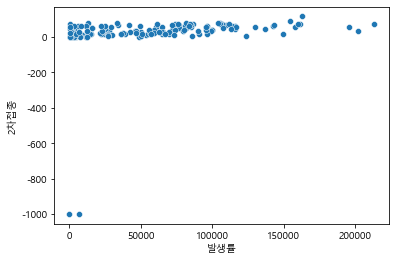

In [11]:
sns.scatterplot(x='발생률', y='2차접종', data=corona)

### 이상치 제거

In [14]:
corona = corona[corona['2차접종'] > 0]

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

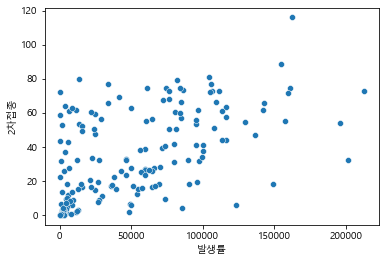

In [15]:
sns.scatterplot(x='발생률', y='2차접종', data=corona)

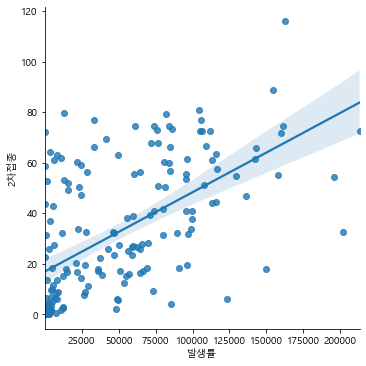

In [16]:
sns.lmplot(x='발생률', y='2차접종', data=corona)

In [17]:
corona[['발생률', '접종률(인구)']].corr()

,발생률,접종률(인구)
발생률,1.000000,0.581599
접종률(인구),0.581599,1.000000


### 확인 결과 나라별 백신 접종률과 인구당 확진자 비율은 0.582의 양의 상관관계를 갖는다.
 * 백신을 접종하면 할수록 인구당 확진자 비율은 양의 관계로 늘어난다.

### 백신 발생률과 사망률(인구당)은 어떠한가?

In [18]:
corona.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0


In [20]:
### 사망률 = 사망자수/인구수
corona['사망률'] = corona['사망자합계'] /  corona['인구수']
corona.head(15)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.002091
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.000323
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.002779
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.001992
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.001364
5,프랑스,France,106557,65273511,6955333,92262410.0,71.2,23.0,22.0,0.106557,76.7,72.7,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.001778
6,터키,Turkey,81187,84339067,6847259,105114640.0,63.2,45.0,41.0,0.081187,63.3,50.5,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0,0.000730
7,이란,Iran,64794,83992949,5442232,42003864.0,25.2,62.0,107.0,0.064794,34.1,16.6,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0,0.001399
8,아르헨티나,Argentina,115923,45195774,5239232,49017570.0,54.5,16.0,61.0,0.115923,64.5,44.3,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0,0.002532
9,콜롬비아,Colombia,97107,50882891,4941064,38331644.0,38.0,30.0,80.0,0.097107,49.3,31.7,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0,0.002474


### 가설 : 백신은 중증과 사망자 감소에 효과가 있다.

### 2-1 백신 접종률과 사망률의 관계는 어떠한가?

In [21]:
corona[['사망률', '접종률(인구)']].corr()

,사망률,접종률(인구)
사망률,1.000000,0.321279
접종률(인구),0.321279,1.000000


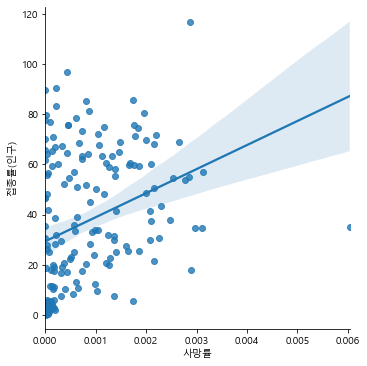

In [22]:
sns.lmplot(x='사망률', y='접종률(인구)', data=corona)

### 백신 접종률과 사망률은 0.324의 양의 상관관계를 갖는다.
 * 데이터로 봤을 때, 이 부분에 대한 확인이 필요해 보인다.

### 2-2 백신 접종률과 중증 감소의 관계는 어떠한가?

In [23]:
corona.head(3)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.002091
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.000323
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.002779


In [24]:
corona['위중증'].unique()

array(['24327\n-523', '8944', '8318', '1020', '2300', '1832\n-168', '633',
       '6707\n-58', '1496\n-20', '542', '1028', '530\n+11', nan, '1217',
       '4798', '113\n+2', '3170', '177', '1043\n+9', '1191\n+26',
       '208\n+11', '618\n+2', '28\n-1', '1458\n-42', '434\n-4', '638',
       '1403', '4387', '714\n-12', '4840\n-124', '218', '952\n+103', '43',
       '86\n-4', '776\n+3', '181\n-2', '221', '260\n+3', '45\n+4',
       '509\n+2', '503\n+42', '219\n+7', '380\n-5', '348', '200',
       '339\n-4', '5', '759', '489', '220', '391\n-5', '108', '37\n+1',
       '16\n-1', '60\n+1', '85\n+4', '11', '63\n-3', '515', '681',
       '22\n-1', '784\n-16', '166\n+4', '19\n-8', '90', '332\n-1',
       '63\n+3', '100\n+6', '192', '2', '109', '19\n+1', '21\n-3',
       '20\n+1', '131', '1', '23', '3', '1124', '36\n-2', '18', '32',
       '20', '12', '19', '42', '381', '45', '127\n-31', '19\n-4', '292',
       '152', '55\n-2', '21\n+3', '9', '7\n-1', '67', '8', '39', '10',
       '22', '24', '

### Learn02. Pandas 문자열 처리
 * [].str.strip() : 앞뒤 공백을 제거
 * [].str.lstrip() : 앞 공백을 제거
 * [].str.rstrip() : 뒤 공백을 제거
 * [].str.split('구분자', n=1, expand=True)  : 구분자를 기준으로 n개로 나눈다. expand=True(여러컬럼), False(하나의 컬럼)

In [25]:
corona[['위중증_수', '위중증_증감']] = corona['위중증'].str.split('\n', n=2, expand=True)
corona.head(15)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.002091,24327,-523
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.000323,8944,None
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.002779,8318,None
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.001992,1020,None
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.001364,2300,None
5,프랑스,France,106557,65273511,6955333,92262410.0,71.2,23.0,22.0,0.106557,76.7,72.7,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.001778,1832,-168
6,터키,Turkey,81187,84339067,6847259,105114640.0,63.2,45.0,41.0,0.081187,63.3,50.5,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0,0.000730,633,None
7,이란,Iran,64794,83992949,5442232,42003864.0,25.2,62.0,107.0,0.064794,34.1,16.6,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0,0.001399,6707,-58
8,아르헨티나,Argentina,115923,45195774,5239232,49017570.0,54.5,16.0,61.0,0.115923,64.5,44.3,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0,0.002532,1496,-20
9,콜롬비아,Colombia,97107,50882891,4941064,38331644.0,38.0,30.0,80.0,0.097107,49.3,31.7,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0,0.002474,542,None


In [26]:
### 사망률 = 사망자수/인구수
corona['위중증률'] = corona['위중증_수'] /  corona['인구수']
corona.head(15)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### 에러 발생 
 * TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Learn 03. 데이터 타입 변경하기

 * [].astype(dtype) :  모든 열의 데이터 타입을 변경
 * [].astype( {'컬럼명':dtype} ) : 특정 컬럼의 데이터 타입을 변경
   * str, int, float, category 등
   * int8, int16, int32, int64와 같이 변경 가능

In [27]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   국가명         176 non-null    object 
 1   eng_code    176 non-null    object 
 2   발생률         176 non-null    int64  
 3   인구수         176 non-null    int64  
 4   확진자_합계      176 non-null    int64  
 5   백신접종        176 non-null    float64
 6   접종률(인구)     176 non-null    float64
 7   발생률_순위      176 non-null    float64
 8   접종률_순위      176 non-null    float64
 9   확진자비율_전체인구  176 non-null    float64
 10  1차접종        176 non-null    float64
 11  2차접종        176 non-null    float64
 12  위중증         131 non-null    object 
 13  치명(%)       176 non-null    object 
 14  완치(%)       173 non-null    float64
 15  확진자1일       130 non-null    float64
 16  사망자합계       176 non-null    int64  
 17  사망자1일       104 non-null    float64
 18  완치합계        173 non-null    float64
 19  완치1일        115 non-null    f

In [28]:
corona['위중증_수'] = corona['위중증_수'].astype('int64')

ValueError: cannot convert float NaN to integer

### 에러 발생 
 * ValueError: cannot convert float NaN to integer

In [29]:
corona['위중증_수'].unique()

array(['24327', '8944', '8318', '1020', '2300', '1832', '633', '6707',
       '1496', '542', '1028', '530', nan, '1217', '4798', '113', '3170',
       '177', '1043', '1191', '208', '618', '28', '1458', '434', '638',
       '1403', '4387', '714', '4840', '218', '952', '43', '86', '776',
       '181', '221', '260', '45', '509', '503', '219', '380', '348',
       '200', '339', '5', '759', '489', '220', '391', '108', '37', '16',
       '60', '85', '11', '63', '515', '681', '22', '784', '166', '19',
       '90', '332', '100', '192', '2', '109', '21', '20', '131', '1',
       '23', '3', '1124', '36', '18', '32', '12', '42', '381', '127',
       '292', '152', '55', '9', '7', '67', '8', '39', '10', '24', '15',
       '4', '6'], dtype=object)

### Learn 04. 어떻게 NaN을 체크할 것인가?

In [30]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   국가명         176 non-null    object 
 1   eng_code    176 non-null    object 
 2   발생률         176 non-null    int64  
 3   인구수         176 non-null    int64  
 4   확진자_합계      176 non-null    int64  
 5   백신접종        176 non-null    float64
 6   접종률(인구)     176 non-null    float64
 7   발생률_순위      176 non-null    float64
 8   접종률_순위      176 non-null    float64
 9   확진자비율_전체인구  176 non-null    float64
 10  1차접종        176 non-null    float64
 11  2차접종        176 non-null    float64
 12  위중증         131 non-null    object 
 13  치명(%)       176 non-null    object 
 14  완치(%)       173 non-null    float64
 15  확진자1일       130 non-null    float64
 16  사망자합계       176 non-null    int64  
 17  사망자1일       104 non-null    float64
 18  완치합계        173 non-null    float64
 19  완치1일        115 non-null    f

### 위중증_수가 isnull()인 것을 살펴보기

In [31]:
corona[  corona['위중증_수'].isnull() ] 

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감
12,인도네시아,Indonesia,15328,273523615,4192695,1.234548e+08,23.1,109.0,111.0,0.015328,29.4,16.80,NaN,3.4,95.3,1932.0,140634,166.0,3996125.0,6799.0,1381673.0,0.000514,NaN,NaN
41,네팔,Nepal,26960,29136808,785541,1.178218e+07,20.7,97.0,115.0,0.026960,21.8,19.50,NaN,1.4,95.8,975.0,11048,8.0,752170.0,2957.0,120269.0,0.000379,NaN,NaN
42,아랍에미레이트,UAE,74113,9890402,733003,1.944587e+07,90.5,52.0,3.0,0.074113,84.5,74.50,NaN,0.3,98.9,313.0,2077,2.0,724855.0,409.0,71904.0,0.000210,NaN,NaN
45,베트남,Vietnam,7148,97338579,695744,3.355536e+07,17.4,125.0,125.5,0.007148,28.2,6.60,NaN,2.5,66.7,8681.0,17305,215.0,464326.0,6821.0,920967.0,0.000178,NaN,NaN
48,조지아,Georgia,149386,3989167,595926,1.610309e+06,21.6,9.0,114.0,0.149386,25.1,18.10,NaN,1.4,94.6,662.0,8575,34.0,563530.0,3534.0,30838.0,0.002150,NaN,NaN
51,벨라루스,Belarus,54858,9449323,518369,3.206505e+06,16.9,74.0,127.0,0.054858,18.5,15.40,NaN,0.8,97.3,1941.0,4016,12.0,504561.0,1295.0,17321.0,0.000425,NaN,NaN
54,스리랑카,Sri Lanka,23560,21413249,504491,2.480400e+07,56.9,102.0,55.0,0.023560,62.9,50.30,NaN,2.4,85.6,1733.0,12125,103.0,432038.0,1002.0,114450.0,0.000566,NaN,NaN
57,아제르바이잔,Azerbaijan,46623,10139177,472719,7.806235e+06,39.1,82.0,78.0,0.046623,45.8,32.40,NaN,1.3,91.8,NaN,6305,NaN,434095.0,NaN,53555.0,0.000622,NaN,NaN
60,미얀마,Myanmar,8208,54409800,446573,8.184418e+06,7.7,121.0,139.0,0.008208,9.4,6.10,NaN,3.8,89.2,1702.0,17073,57.0,398220.0,2365.0,83945.0,0.000314,NaN,NaN
70,리비아,Libya,48321,6871292,332026,1.393696e+06,10.6,81.0,134.0,0.048321,19.0,2.10,NaN,1.4,74.7,1081.0,4517,16.0,248119.0,1310.0,22693.0,0.000657,NaN,NaN


In [56]:
corona['위중증_수'].isnull().sum()

45

In [57]:
corona['위중증_수'].isna().sum()

45

### (의문) 왜 47개국은 위증증 통계가 없을까?

### 위증증_수2를 만들고, 위증증수가 없는 것은 -99999로 만들자.

In [58]:
corona['위중증_수2'] = corona['위중증_수'].copy()

In [59]:
corona.loc[ corona['위중증_수2'].isnull(), "위중증_수2"] = -99999
corona[  corona['위중증_수2'].isnull() ] 

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률


In [60]:
corona['위중증_수2'] = corona['위중증_수2'].astype('int64')

In [61]:
### 사망률 = 사망자수/인구수
corona['위중증률'] = corona['위중증_수2'] /  corona['인구수']
corona.head(15)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.002091,24327,-523,24327,0.000073
1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.000323,8944,None,8944,0.000006
2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.002779,8318,None,8318,0.000039
3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.001992,1020,None,1020,0.000015
4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.001364,2300,None,2300,0.000016
5,프랑스,France,106557,65273511,6955333,92262410.0,71.2,23.0,22.0,0.106557,76.7,72.7,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.001778,1832,-168,1832,0.000028
6,터키,Turkey,81187,84339067,6847259,105114640.0,63.2,45.0,41.0,0.081187,63.3,50.5,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0,0.000730,633,None,633,0.000008
7,이란,Iran,64794,83992949,5442232,42003864.0,25.2,62.0,107.0,0.064794,34.1,16.6,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0,0.001399,6707,-58,6707,0.000080
8,아르헨티나,Argentina,115923,45195774,5239232,49017570.0,54.5,16.0,61.0,0.115923,64.5,44.3,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0,0.002532,1496,-20,1496,0.000033
9,콜롬비아,Colombia,97107,50882891,4941064,38331644.0,38.0,30.0,80.0,0.097107,49.3,31.7,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0,0.002474,542,None,542,0.000011


In [62]:
corona.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '발생률_순위',
       '접종률_순위', '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '사망률', '위중증_수',
       '위중증_증감', '위중증_수2', '위중증률'],
      dtype='object')

In [63]:
corona_sel = ['국가명', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)',  
              '사망률', '위중증', '위중증_증감', '위중증_수', '위중증_수2', '위중증률']
corona_part = corona[corona_sel]
corona_part

,국가명,발생률,인구수,확진자_합계,백신접종,접종률(인구),사망률,위중증,위중증_증감,위중증_수,위중증_수2,위중증률
0,미국,129632,331002651,42908619,3.855860e+08,60.2,0.002091,24327\n-523,-523,24327,24327,7.349488e-05
1,인도,24277,1380004385,33483170,8.083893e+08,29.6,0.000323,8944,None,8944,8944,6.481139e-06
2,브라질,99924,212559417,21239783,2.223227e+08,53.9,0.002779,8318,None,8318,8318,3.913259e-05
3,영국,109444,67886011,7429746,9.300209e+07,69.6,0.001992,1020,None,1020,1020,1.502519e-05
4,러시아,49986,145934462,7294672,8.781062e+07,29.9,0.001364,2300,None,2300,2300,1.576050e-05
5,프랑스,106557,65273511,6955333,9.226241e+07,71.2,0.001778,1832\n-168,-168,1832,1832,2.806652e-05
6,터키,81187,84339067,6847259,1.051146e+08,63.2,0.000730,633,None,633,633,7.505419e-06
7,이란,64794,83992949,5442232,4.200386e+07,25.2,0.001399,6707\n-58,-58,6707,6707,7.985194e-05
8,아르헨티나,115923,45195774,5239232,4.901757e+07,54.5,0.002532,1496\n-20,-20,1496,1496,3.310044e-05
9,콜롬비아,97107,50882891,4941064,3.833164e+07,38.0,0.002474,542,None,542,542,1.065191e-05


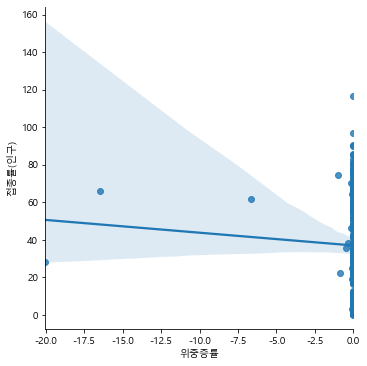

In [64]:
sns.lmplot(x='위중증률', y='접종률(인구)', data=corona_part)

In [65]:
corona_part[['위중증률', '접종률(인구)']].corr()

,위중증률,접종률(인구)
위중증률,1.000000,-0.049512
접종률(인구),-0.049512,1.000000


### 결과 확인 : 인구당 접종률과 위중증률은 거의 관계가 없다.

### 오류가 없을까?
 * 오류: -99999 데이터가 있었기에 정확하지 않을 수 있다.

In [66]:
corona_part['위중증'].notnull().sum()

131

In [67]:
corona_part = corona_part[ corona_part['위중증'].notnull() ] 
corona_part['위중증'].isnull().sum()

0

In [68]:
corona_part[['위중증률', '접종률(인구)']].corr()

,위중증률,접종률(인구)
위중증률,1.000000,0.275532
접종률(인구),0.275532,1.000000


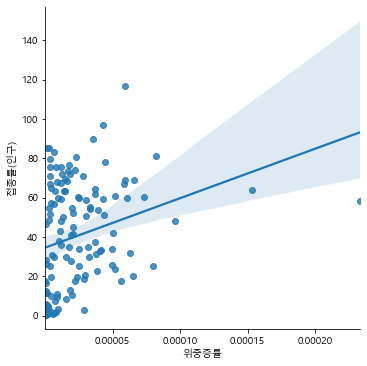

In [69]:
sns.lmplot(x='위중증률', y='접종률(인구)', data=corona_part)

### 확인 : 데이터가 있는 131개국의 인구당 접종률과 위중증률은 0.2755로 양의 상관관계를 갖는다.

In [70]:
corona

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,129632,331002651,42908619,3.855860e+08,60.2,13.0,46.0,0.129632,63.8,54.60,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.002091,24327,-523,24327,7.349488e-05
1,인도,India,24277,1380004385,33483170,8.083893e+08,29.6,101.0,99.0,0.024263,43.7,14.50,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.000323,8944,None,8944,6.481139e-06
2,브라질,Brazil,99924,212559417,21239783,2.223227e+08,53.9,27.0,62.0,0.099924,69.4,37.80,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.002779,8318,None,8318,3.913259e-05
3,영국,U.K.,109444,67886011,7429746,9.300209e+07,69.6,21.0,25.0,0.109444,72.7,66.50,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.001992,1020,None,1020,1.502519e-05
4,러시아,Russia,49986,145934462,7294672,8.781062e+07,29.9,77.0,97.0,0.049986,31.9,27.60,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.001364,2300,None,2300,1.576050e-05
5,프랑스,France,106557,65273511,6955333,9.226241e+07,71.2,23.0,22.0,0.106557,76.7,72.70,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.001778,1832,-168,1832,2.806652e-05
6,터키,Turkey,81187,84339067,6847259,1.051146e+08,63.2,45.0,41.0,0.081187,63.3,50.50,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0,0.000730,633,None,633,7.505419e-06
7,이란,Iran,64794,83992949,5442232,4.200386e+07,25.2,62.0,107.0,0.064794,34.1,16.60,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0,0.001399,6707,-58,6707,7.985194e-05
8,아르헨티나,Argentina,115923,45195774,5239232,4.901757e+07,54.5,16.0,61.0,0.115923,64.5,44.30,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0,0.002532,1496,-20,1496,3.310044e-05
9,콜롬비아,Colombia,97107,50882891,4941064,3.833164e+07,38.0,30.0,80.0,0.097107,49.3,31.70,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0,0.002474,542,None,542,1.065191e-05


### 실습과제 : 인구 100만 이상의 국가에 대해서 다시 수행해 보자.
  * 접종률과 인구당 발생률 관계 확인
  * 접종률과 사망률과 중증률 관계 확인

### 의문 : 그렇다면 전체 국가가 아닌 30개의 국가의 데이터를 확인해 보면 어떨까?

## 02. 접종률이 높은 30개의 국가의 데이터를 확인해 보기

In [71]:
corona_top30 = corona[corona['접종률_순위']<=30]
corona_top30.shape

(30, 26)

In [72]:
corona_top30

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
3,영국,U.K.,109444,67886011,7429746,9.300209e+07,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.001992,1020,None,1020,0.000015
5,프랑스,France,106557,65273511,6955333,9.226241e+07,71.2,23.0,22.0,0.106557,76.7,72.7,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.001778,1832,-168,1832,0.000028
10,스페인,Spain,105434,46754778,4929546,6.909466e+07,74.3,24.0,18.0,0.105434,80.4,77.0,1028,1.7,94.0,NaN,85783,NaN,4633527.0,NaN,140084.0,0.001835,1028,None,1028,0.000022
11,이탈리아,Italy,76678,60461826,4636111,8.237767e+07,68.2,49.0,29.0,0.076678,73.3,67.9,530\n+11,2.8,94.7,3836.0,130310,26.0,4392265.0,3314.0,219232.0,0.002155,530,+11,530,0.000009
20,네덜란드,Netherlands,115918,17134872,1986241,2.332039e+07,67.7,17.0,30.0,0.115918,70.0,63.4,208\n+11,0.9,NaN,1326.0,18123,9.0,NaN,NaN,40806.0,0.001058,208,+11,208,0.000012
24,칠레,Chile,86196,19116201,1647746,3.078569e+07,80.6,38.0,9.0,0.086196,76.8,73.3,434\n-4,2.3,97.4,277.0,37367,8.0,1604353.0,419.0,83791.0,0.001955,434,-4,434,0.000023
25,캐나다,Canada,41687,37742154,1573359,5.506036e+07,73.4,86.0,19.0,0.041687,75.4,69.6,638,1.7,95.3,2032.0,27395,11.0,1499483.0,997.0,94377.0,0.000726,638,None,638,0.000017
28,이스라엘,Israel,142297,8655535,1231660,1.473209e+07,81.4,11.0,8.0,0.142297,67.0,61.6,714\n-12,0.6,93.2,9947.0,7541,30.0,1147578.0,17185.0,44039.0,0.000871,714,-12,714,0.000082
30,벨기에,Belgium,105251,11589623,1219814,1.644224e+07,71.8,25.0,21.0,0.105251,74.3,72.4,218,2.1,93.0,NaN,25497,NaN,1133872.0,NaN,12861.0,0.002200,218,None,218,0.000019
33,포르투갈,Portugal,104156,10196709,1062048,1.555099e+07,75.7,26.0,15.0,0.104156,86.1,81.0,86\n-4,1.7,95.1,677.0,17907,5.0,1010168.0,651.0,35729.0,0.001756,86,-4,86,0.000008


### Learn 05. 데이터의 인덱스를 다시 재설정하기

* [].reset_index(inplace=True)

In [73]:
corona_top30.reset_index(inplace=True)
corona_top30

,index,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,3,영국,U.K.,109444,67886011,7429746,9.300209e+07,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.001992,1020,None,1020,0.000015
1,5,프랑스,France,106557,65273511,6955333,9.226241e+07,71.2,23.0,22.0,0.106557,76.7,72.7,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.001778,1832,-168,1832,0.000028
2,10,스페인,Spain,105434,46754778,4929546,6.909466e+07,74.3,24.0,18.0,0.105434,80.4,77.0,1028,1.7,94.0,NaN,85783,NaN,4633527.0,NaN,140084.0,0.001835,1028,None,1028,0.000022
3,11,이탈리아,Italy,76678,60461826,4636111,8.237767e+07,68.2,49.0,29.0,0.076678,73.3,67.9,530\n+11,2.8,94.7,3836.0,130310,26.0,4392265.0,3314.0,219232.0,0.002155,530,+11,530,0.000009
4,20,네덜란드,Netherlands,115918,17134872,1986241,2.332039e+07,67.7,17.0,30.0,0.115918,70.0,63.4,208\n+11,0.9,NaN,1326.0,18123,9.0,NaN,NaN,40806.0,0.001058,208,+11,208,0.000012
5,24,칠레,Chile,86196,19116201,1647746,3.078569e+07,80.6,38.0,9.0,0.086196,76.8,73.3,434\n-4,2.3,97.4,277.0,37367,8.0,1604353.0,419.0,83791.0,0.001955,434,-4,434,0.000023
6,25,캐나다,Canada,41687,37742154,1573359,5.506036e+07,73.4,86.0,19.0,0.041687,75.4,69.6,638,1.7,95.3,2032.0,27395,11.0,1499483.0,997.0,94377.0,0.000726,638,None,638,0.000017
7,28,이스라엘,Israel,142297,8655535,1231660,1.473209e+07,81.4,11.0,8.0,0.142297,67.0,61.6,714\n-12,0.6,93.2,9947.0,7541,30.0,1147578.0,17185.0,44039.0,0.000871,714,-12,714,0.000082
8,30,벨기에,Belgium,105251,11589623,1219814,1.644224e+07,71.8,25.0,21.0,0.105251,74.3,72.4,218,2.1,93.0,NaN,25497,NaN,1133872.0,NaN,12861.0,0.002200,218,None,218,0.000019
9,33,포르투갈,Portugal,104156,10196709,1062048,1.555099e+07,75.7,26.0,15.0,0.104156,86.1,81.0,86\n-4,1.7,95.1,677.0,17907,5.0,1010168.0,651.0,35729.0,0.001756,86,-4,86,0.000008


### Learn 06. 데이터를 정렬시키기 2가지
 * sort_index() : 인덱스를 기준으로 정렬
 * sort_values(by=[], ascending=False, axis=0,1, inplace=True or False) : 컬럼의 값을 기준으로 데이터 정렬
   * by : 정렬할 열 선택
   * axis : 0 : index, 1: columns

In [74]:
corona_top30.columns

Index(['index', '국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)',
       '발생률_순위', '접종률_순위', '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)',
       '완치(%)', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '사망률',
       '위중증_수', '위중증_증감', '위중증_수2', '위중증률'],
      dtype='object')

In [75]:
corona_sel = ['국가명', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '확진자비율_전체인구',
              '발생률_순위', '접종률_순위', '사망률', '위중증_수2', '위중증_증감', '위중증률']
corona_top30_part = corona_top30[corona_sel]
corona_top30_part

,국가명,발생률,인구수,확진자_합계,백신접종,접종률(인구),확진자비율_전체인구,발생률_순위,접종률_순위,사망률,위중증_수2,위중증_증감,위중증률
0,영국,109444,67886011,7429746,9.300209e+07,69.6,0.109444,21.0,25.0,0.001992,1020,None,0.000015
1,프랑스,106557,65273511,6955333,9.226241e+07,71.2,0.106557,23.0,22.0,0.001778,1832,-168,0.000028
2,스페인,105434,46754778,4929546,6.909466e+07,74.3,0.105434,24.0,18.0,0.001835,1028,None,0.000022
3,이탈리아,76678,60461826,4636111,8.237767e+07,68.2,0.076678,49.0,29.0,0.002155,530,+11,0.000009
4,네덜란드,115918,17134872,1986241,2.332039e+07,67.7,0.115918,17.0,30.0,0.001058,208,+11,0.000012
5,칠레,86196,19116201,1647746,3.078569e+07,80.6,0.086196,38.0,9.0,0.001955,434,-4,0.000023
6,캐나다,41687,37742154,1573359,5.506036e+07,73.4,0.041687,86.0,19.0,0.000726,638,None,0.000017
7,이스라엘,142297,8655535,1231660,1.473209e+07,81.4,0.142297,11.0,8.0,0.000871,714,-12,0.000082
8,벨기에,105251,11589623,1219814,1.644224e+07,71.8,0.105251,25.0,21.0,0.002200,218,None,0.000019
9,포르투갈,104156,10196709,1062048,1.555099e+07,75.7,0.104156,26.0,15.0,0.001756,86,-4,0.000008


In [76]:
# 접종률_순위 을 기준으로 정렬, 내림차순
corona_top30_part_sorted = corona_top30_part.sort_values(by=['접종률_순위'], ascending=True)

In [77]:
corona_top30_part_sorted

,국가명,발생률,인구수,확진자_합계,백신접종,접종률(인구),확진자비율_전체인구,발생률_순위,접종률_순위,사망률,위중증_수2,위중증_증감,위중증률
25,지브롤터,162625,33691,5479,7.926900e+04,116.6,0.162625,4.0,1.0,0.002879,2,None,0.000059
19,몰디브,154615,540544,83576,7.206660e+05,96.9,0.154615,8.0,2.0,0.000424,23,None,0.000043
11,아랍에미레이트,74113,9890402,733003,1.944587e+07,90.5,0.074113,52.0,3.0,0.000210,-99999,NaN,-0.010111
29,그린란드,8173,56770,464,1.023570e+05,89.8,0.008173,122.0,4.0,0.000000,2,None,0.000035
12,우루과이,111588,3473730,387627,6.017599e+06,85.5,0.111588,20.0,5.0,0.001741,11,None,0.000003
15,바레인,161182,1701575,274264,2.535900e+06,85.4,0.161182,5.0,6.0,0.000816,2,None,0.000001
16,카타르,81785,2881053,235626,4.658268e+06,83.3,0.081785,44.0,7.0,0.000210,19,+1,0.000007
7,이스라엘,142297,8655535,1231660,1.473209e+07,81.4,0.142297,11.0,8.0,0.000871,714,-12,0.000082
5,칠레,86196,19116201,1647746,3.078569e+07,80.6,0.086196,38.0,9.0,0.001955,434,-4,0.000023
20,싱가포르,13299,5850342,77804,9.104751e+06,79.8,0.013299,111.0,10.0,0.000010,21,+3,0.000004


In [78]:
corona_top30_part_sorted.reset_index(inplace=True)

In [79]:
corona_top30_part_sorted

,index,국가명,발생률,인구수,확진자_합계,백신접종,접종률(인구),확진자비율_전체인구,발생률_순위,접종률_순위,사망률,위중증_수2,위중증_증감,위중증률
0,25,지브롤터,162625,33691,5479,7.926900e+04,116.6,0.162625,4.0,1.0,0.002879,2,None,0.000059
1,19,몰디브,154615,540544,83576,7.206660e+05,96.9,0.154615,8.0,2.0,0.000424,23,None,0.000043
2,11,아랍에미레이트,74113,9890402,733003,1.944587e+07,90.5,0.074113,52.0,3.0,0.000210,-99999,NaN,-0.010111
3,29,그린란드,8173,56770,464,1.023570e+05,89.8,0.008173,122.0,4.0,0.000000,2,None,0.000035
4,12,우루과이,111588,3473730,387627,6.017599e+06,85.5,0.111588,20.0,5.0,0.001741,11,None,0.000003
5,15,바레인,161182,1701575,274264,2.535900e+06,85.4,0.161182,5.0,6.0,0.000816,2,None,0.000001
6,16,카타르,81785,2881053,235626,4.658268e+06,83.3,0.081785,44.0,7.0,0.000210,19,+1,0.000007
7,7,이스라엘,142297,8655535,1231660,1.473209e+07,81.4,0.142297,11.0,8.0,0.000871,714,-12,0.000082
8,5,칠레,86196,19116201,1647746,3.078569e+07,80.6,0.086196,38.0,9.0,0.001955,434,-4,0.000023
9,20,싱가포르,13299,5850342,77804,9.104751e+06,79.8,0.013299,111.0,10.0,0.000010,21,+3,0.000004


### 상관관계 확인하기

In [80]:
corona_top30_part_sorted[['접종률(인구)', '확진자비율_전체인구']].corr()

,접종률(인구),확진자비율_전체인구
접종률(인구),1.000000,0.198458
확진자비율_전체인구,0.198458,1.000000


In [81]:
corona_top30_part_sorted[['접종률(인구)', '사망률']].corr()

,접종률(인구),사망률
접종률(인구),1.000000,0.017558
사망률,0.017558,1.000000


In [82]:
corona_top30_part_sorted[['접종률(인구)', '위중증률']].corr()

,접종률(인구),위중증률
접종률(인구),1.000000,0.075372
위중증률,0.075372,1.000000


### 접종률 상위 30개국의 데이터 확인 결과 큰 연관관계가 보이지 않는다.

### 실습 : 위증증 데이터는 처리가 안되었다. 이를 처리해 보자.

### 03. 200만 이상의 국가에 대해서 확인

In [83]:
corona_200m = corona[corona['인구수']>=2000000]
corona_200m.shape

(135, 26)

In [85]:
corona_200m.reset_index(inplace=True)
corona_200m.head(10)

,level_0,index,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,0,0,미국,U.S.,129632,331002651,42908619,385586020.0,60.2,13.0,46.0,0.129632,63.8,54.6,24327\n-523,1.6,75.8,41814.0,691992,430.0,32508846.0,25620.0,763444.0,0.002091,24327,-523,24327,0.000073
1,1,1,인도,India,24277,1380004385,33483170,808389300.0,29.6,101.0,99.0,0.024263,43.7,14.5,8944,1.3,97.7,32085.0,445248,349.0,32715105.0,43938.0,9236028.0,0.000323,8944,None,8944,0.000006
2,2,2,브라질,Brazil,99924,212559417,21239783,222322660.0,53.9,27.0,62.0,0.099924,69.4,37.8,8318,2.8,95.5,9458.0,590786,239.0,20280294.0,NaN,1721039.0,0.002779,8318,None,8318,0.000039
3,3,3,영국,U.K.,109444,67886011,7429746,93002090.0,69.6,21.0,25.0,0.109444,72.7,66.5,1020,1.8,80.5,29007.0,135203,56.0,5981684.0,22993.0,83947.0,0.001992,1020,None,1020,0.000015
4,4,4,러시아,Russia,49986,145934462,7294672,87810616.0,29.9,77.0,97.0,0.049986,31.9,27.6,2300,2.7,89.3,19744.0,198996,778.0,6510674.0,11992.0,354749.0,0.001364,2300,None,2300,0.000016
5,5,5,프랑스,France,106557,65273511,6955333,92262410.0,71.2,23.0,22.0,0.106557,76.7,72.7,1832\n-168,1.7,95.6,5814.0,116030,28.0,6649678.0,23192.0,242012.0,0.001778,1832,-168,1832,0.000028
6,6,6,터키,Turkey,81187,84339067,6847259,105114640.0,63.2,45.0,41.0,0.081187,63.3,50.5,633,0.9,92.5,26398.0,61574,213.0,6337070.0,27160.0,472820.0,0.000730,633,None,633,0.000008
7,7,7,이란,Iran,64794,83992949,5442232,42003864.0,25.2,62.0,107.0,0.064794,34.1,16.6,6707\n-58,2.2,88.1,17397.0,117526,344.0,4792117.0,27119.0,1114116.0,0.001399,6707,-58,6707,0.000080
8,8,8,아르헨티나,Argentina,115923,45195774,5239232,49017570.0,54.5,16.0,61.0,0.115923,64.5,44.3,1496\n-20,2.2,97.3,622.0,114428,61.0,5096283.0,2932.0,290888.0,0.002532,1496,-20,1496,0.000033
9,9,9,콜롬비아,Colombia,97107,50882891,4941064,38331644.0,38.0,30.0,80.0,0.097107,49.3,31.7,542,2.5,96.7,1813.0,125895,35.0,4779552.0,1756.0,163255.0,0.002474,542,None,542,0.000011


In [86]:
corona_sel = ['국가명', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '확진자비율_전체인구',
              '발생률_순위', '접종률_순위', '사망률', '위중증_수2', '위중증_증감', '위중증률']
corona_200m_part = corona_200m[corona_sel]
corona_200m_part.head(10)


,국가명,발생률,인구수,확진자_합계,백신접종,접종률(인구),확진자비율_전체인구,발생률_순위,접종률_순위,사망률,위중증_수2,위중증_증감,위중증률
0,미국,129632,331002651,42908619,385586020.0,60.2,0.129632,13.0,46.0,0.002091,24327,-523,0.000073
1,인도,24277,1380004385,33483170,808389300.0,29.6,0.024263,101.0,99.0,0.000323,8944,None,0.000006
2,브라질,99924,212559417,21239783,222322660.0,53.9,0.099924,27.0,62.0,0.002779,8318,None,0.000039
3,영국,109444,67886011,7429746,93002090.0,69.6,0.109444,21.0,25.0,0.001992,1020,None,0.000015
4,러시아,49986,145934462,7294672,87810616.0,29.9,0.049986,77.0,97.0,0.001364,2300,None,0.000016
5,프랑스,106557,65273511,6955333,92262410.0,71.2,0.106557,23.0,22.0,0.001778,1832,-168,0.000028
6,터키,81187,84339067,6847259,105114640.0,63.2,0.081187,45.0,41.0,0.000730,633,None,0.000008
7,이란,64794,83992949,5442232,42003864.0,25.2,0.064794,62.0,107.0,0.001399,6707,-58,0.000080
8,아르헨티나,115923,45195774,5239232,49017570.0,54.5,0.115923,16.0,61.0,0.002532,1496,-20,0.000033
9,콜롬비아,97107,50882891,4941064,38331644.0,38.0,0.097107,30.0,80.0,0.002474,542,None,0.000011


In [87]:
corona_200m_part_sorted = corona_200m_part.sort_values(by=['접종률(인구)'], ascending=False)
corona_200m_part_sorted.head(10)


,국가명,발생률,인구수,확진자_합계,백신접종,접종률(인구),확진자비율_전체인구,발생률_순위,접종률_순위,사망률,위중증_수2,위중증_증감,위중증률
42,아랍에미레이트,74113,9890402,733003,1.944587e+07,90.5,0.074113,52.0,3.0,0.000210,-99999,NaN,-0.010111
64,우루과이,111588,3473730,387627,6.017599e+06,85.5,0.111588,20.0,5.0,0.001741,11,None,0.000003
80,카타르,81785,2881053,235626,4.658268e+06,83.3,0.081785,44.0,7.0,0.000210,19,+1,0.000007
28,이스라엘,142297,8655535,1231660,1.473209e+07,81.4,0.142297,11.0,8.0,0.000871,714,-12,0.000082
24,칠레,86196,19116201,1647746,3.078569e+07,80.6,0.086196,38.0,9.0,0.001955,434,-4,0.000023
104,싱가포르,13299,5850342,77804,9.104751e+06,79.8,0.013299,111.0,10.0,0.000010,21,+3,0.000004
40,쿠바,71505,11326616,809911,1.776627e+07,78.4,0.071505,56.0,11.0,0.000605,503,+42,0.000044
99,중국,67,1439323776,95738,2.174043e+09,77.6,0.000067,176.0,12.0,0.000003,-99999,NaN,-0.000069
33,포르투갈,104156,10196709,1062048,1.555099e+07,75.7,0.104156,26.0,15.0,0.001756,86,-4,0.000008
68,덴마크,61274,5792202,354913,8.773849e+06,75.6,0.061274,65.0,16.0,0.000454,22,-1,0.000004


### 상관관계 확인하기

In [88]:
corona_200m_part_sorted[['접종률(인구)', '확진자비율_전체인구']].corr()

,접종률(인구),확진자비율_전체인구
접종률(인구),1.000000,0.606227
확진자비율_전체인구,0.606227,1.000000


In [89]:
corona_200m_part_sorted[['접종률(인구)', '사망률']].corr()

,접종률(인구),사망률
접종률(인구),1.000000,0.374167
사망률,0.374167,1.000000


In [90]:
corona_200m_part_sorted[['접종률(인구)', '위중증률']].corr()

,접종률(인구),위중증률
접종률(인구),1.000000,0.165411
위중증률,0.165411,1.000000


### 결과 확인
### 01. 인구 200만 이상의 국가의 백신 접종률과 인구당 확진자 비율은 양의 상관관계(0.6088)의 관계를 갖는다.
### 02. 인구 200만 이상의 국가의 백신 접종률과 사망률은 양의 상관관계(0.37719)의 관계를 갖는다.
### 03. 인구 200만 이상의 국가의 백신 접종률과 위중증률은 양의 상관관계(0.187)의 관계를 갖는다.(관계가 크지 않음)


### 실습해 보기
 * 위증증 nan의 값에 대해 처리가 되지 않았다. 이를 처리 후, 확인해 보자.